In [2]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

#import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = r'C:\Users\Kristi Liu\Documents\locations.csv'

In [4]:
file = pd.read_csv(path)
file.head()

,Location Type Code,Location Type Desc,Location Code,Location desc,Location Name,Address,Phone,Notes,Lat,Lon
0,COOL_LOCN,Cooling Location,LIBRARY,Library,Agincourt,155 Bonis Ave,416-396-8943,NaN,43.786126,-79.291554
1,COOL_LOCN,Cooling Location,COMM_CNTR,Community Centre,Agincourt RC,31 Glen Watford Dr,416-395-4037,NaN,43.788047,-79.276244
2,COOL_LOCN,Cooling Location,LIBRARY,Library,Albert Campbell,496 Birchmount Rd,416-396-8890,NaN,43.708233,-79.268637
3,COOL_LOCN,Cooling Location,LIBRARY,Library,Albion,1515 Albion Rd,416-394-5170,NaN,43.739821,-79.583958
4,COOL_LOCN,Cooling Location,LIBRARY,Library,Alderwood,2 Orianna Dr,416-394-5310,NaN,43.601512,-79.546536


In [5]:
type(file)

pandas.core.frame.DataFrame

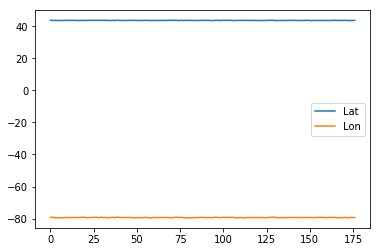

In [6]:
file.plot()

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
Location Type Code    177 non-null object
Location Type Desc    177 non-null object
Location Code         177 non-null object
Location desc         177 non-null object
Location Name         177 non-null object
Address               177 non-null object
Phone                 170 non-null object
Notes                 12 non-null object
Lat                   177 non-null float64
Lon                   177 non-null float64
dtypes: float64(2), object(8)
memory usage: 13.9+ KB


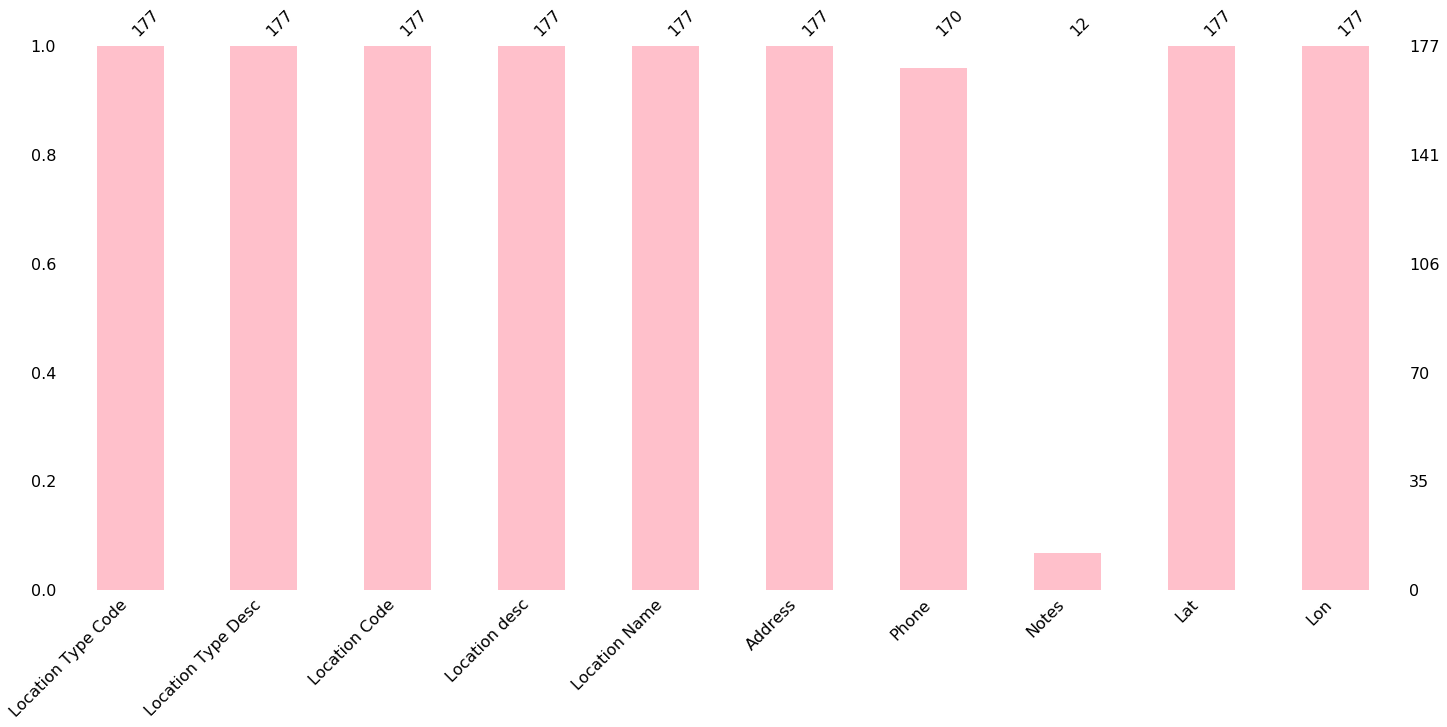

In [8]:
msn.bar(file, color = "pink");

In [9]:
file.describe()

,Lat,Lon
count,177.000000,177.000000
mean,43.718988,-79.386782
std,0.051273,0.109725
min,43.595063,-79.619460
25%,43.675737,-79.465865
50%,43.718877,-79.389133
75%,43.759189,-79.305030
max,43.829879,-79.126003


In [10]:
#combine the lat and long values 
file['Coordinates'] = file[['Lon', 'Lat']].values.tolist()

In [11]:
file.head()

,Location Type Code,Location Type Desc,Location Code,Location desc,Location Name,Address,Phone,Notes,Lat,Lon,Coordinates
0,COOL_LOCN,Cooling Location,LIBRARY,Library,Agincourt,155 Bonis Ave,416-396-8943,NaN,43.786126,-79.291554,"[-79.291554, 43.786126]"
1,COOL_LOCN,Cooling Location,COMM_CNTR,Community Centre,Agincourt RC,31 Glen Watford Dr,416-395-4037,NaN,43.788047,-79.276244,"[-79.27624399999999, 43.788047]"
2,COOL_LOCN,Cooling Location,LIBRARY,Library,Albert Campbell,496 Birchmount Rd,416-396-8890,NaN,43.708233,-79.268637,"[-79.268637, 43.708233]"
3,COOL_LOCN,Cooling Location,LIBRARY,Library,Albion,1515 Albion Rd,416-394-5170,NaN,43.739821,-79.583958,"[-79.583958, 43.739821]"
4,COOL_LOCN,Cooling Location,LIBRARY,Library,Alderwood,2 Orianna Dr,416-394-5310,NaN,43.601512,-79.546536,"[-79.546536, 43.601512]"


In [12]:
#change the coordinates to a geoPoint 
file['Coordinates'] = file['Coordinates'].apply(Point)
file.head()

,Location Type Code,Location Type Desc,Location Code,Location desc,Location Name,Address,Phone,Notes,Lat,Lon,Coordinates
0,COOL_LOCN,Cooling Location,LIBRARY,Library,Agincourt,155 Bonis Ave,416-396-8943,NaN,43.786126,-79.291554,POINT (-79.291554 43.786126)
1,COOL_LOCN,Cooling Location,COMM_CNTR,Community Centre,Agincourt RC,31 Glen Watford Dr,416-395-4037,NaN,43.788047,-79.276244,POINT (-79.27624399999999 43.788047)
2,COOL_LOCN,Cooling Location,LIBRARY,Library,Albert Campbell,496 Birchmount Rd,416-396-8890,NaN,43.708233,-79.268637,POINT (-79.268637 43.708233)
3,COOL_LOCN,Cooling Location,LIBRARY,Library,Albion,1515 Albion Rd,416-394-5170,NaN,43.739821,-79.583958,POINT (-79.583958 43.739821)
4,COOL_LOCN,Cooling Location,LIBRARY,Library,Alderwood,2 Orianna Dr,416-394-5310,NaN,43.601512,-79.546536,POINT (-79.546536 43.601512)


In [13]:
file = geopandas.GeoDataFrame(file, geometry = 'Coordinates')

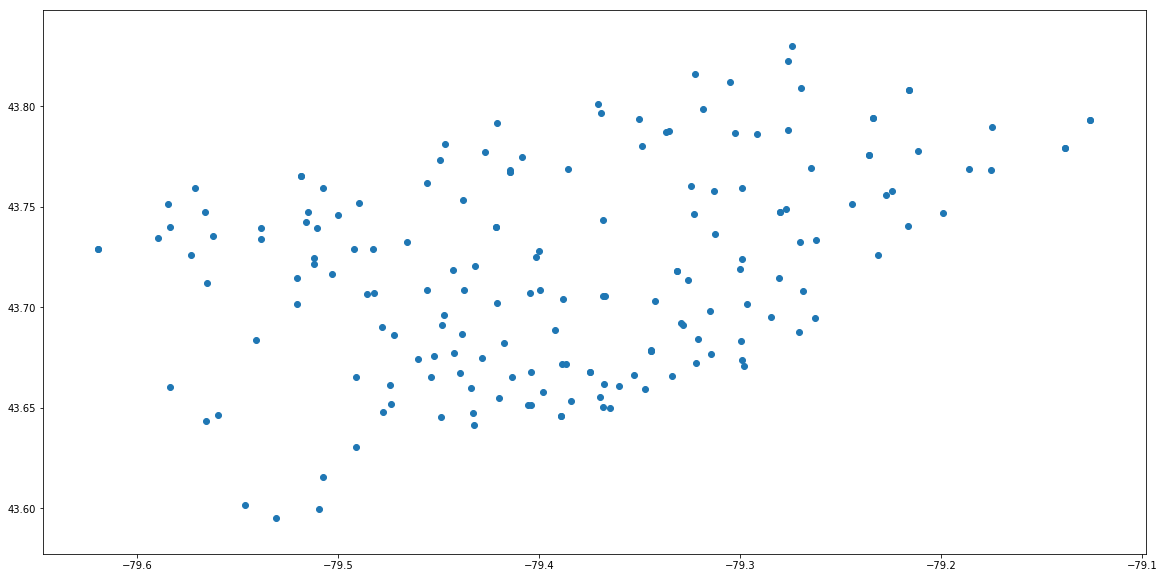

In [14]:
file.plot(figsize=(20,10))

In [15]:
#put these points over a base map 
import geopandas as gpd

In [16]:
fp1 = r"C:\Users\Kristi Liu\Downloads\FME_b01152567941130\obm_OBMUSER_Municipal_upper_tier_poly.shp"
data1 = gpd.read_file(fp1)

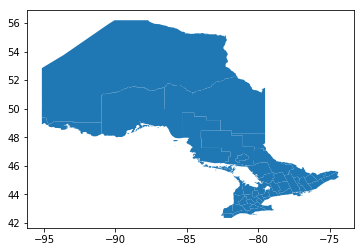

In [17]:
data1.plot()

In [18]:
# Set filepath (fix path relative to yours)
fp2 = r"C:\Users\Kristi Liu\Downloads\FME_5B501365_1549572702747_7700\dataset\OBMINDEX\LIO-2014-06-20\OBM_INDEX.shp"

# Read file using gpd.read_file()
data2 = gpd.read_file(fp2)


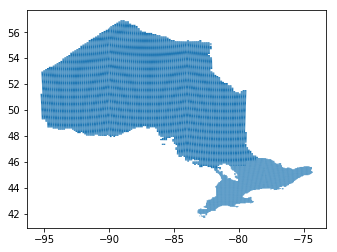

In [19]:
data2.plot()

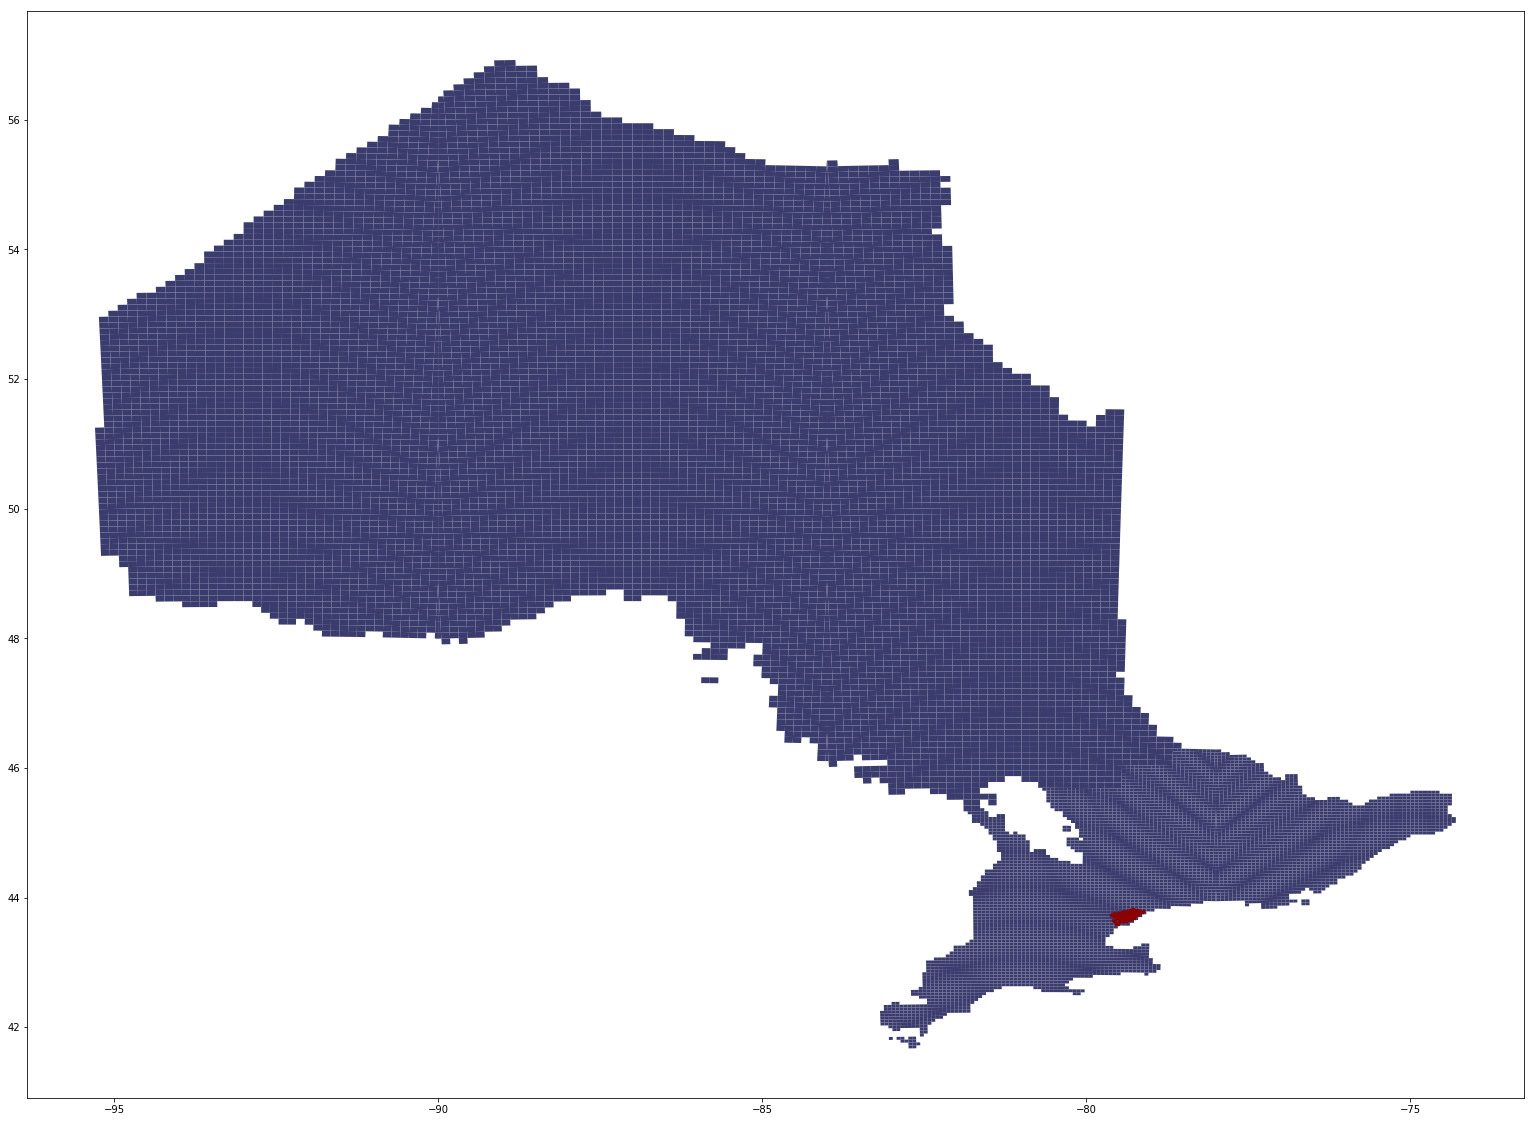

In [20]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = data2.plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
file.plot(ax=base, color='darkred', marker="*", markersize=10);

In [21]:
data2.head()

,OGF_ID,AREA_LEN,NAME,GEO_UPD_DT,EFF_DATE,geometry
0,974665,None,1018410050250,None,20010525,"POLYGON ((-76.1493925981891 45.3746880011905, ..."
1,974669,None,1017595050250,None,20010525,"POLYGON ((-79.72292640226431 45.3733318962959,..."
2,974926,None,1018500050100,None,20010525,"POLYGON ((-74.9362896009239 45.2454332009638, ..."
3,974930,None,1018510050100,None,20010525,"POLYGON ((-74.8088693049334 45.2452901018912, ..."
4,974934,None,1018520050100,None,20010525,"POLYGON ((-74.68145150479779 45.2450050039594,..."


In [25]:
data1.head()

,GEODB_OID,OBJECTID,OBJECT_ID,DESCR,GUT_NUMBER,OFF_NAME,LOC_NAME,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,57733.0,"Municipal, Upper Tier",1293.0,KENORA,KENORA,59.892343,43.715064,"POLYGON ((-90.06036961064243 56.192979267643, ..."
1,2,2,57500.0,"Municipal, Upper Tier",1293.0,COCHRANE,COCHRANE,18.326056,22.814853,POLYGON ((-81.85287731073734 48.27636860954996...
2,3,3,58077.0,"Municipal, Upper Tier",1293.0,RAINY RIVER,RAINY RIVER,2.167149,14.383864,POLYGON ((-93.41765289858587 48.73719579782873...
3,4,4,58203.0,"Municipal, Upper Tier",1293.0,THUNDER BAY,THUNDER BAY,14.709585,25.599438,POLYGON ((-89.22229419027776 48.39160332045273...
4,5,5,58224.0,"Municipal, Upper Tier",1293.0,TIMISKAMING,TIMISKAMING,1.698479,7.566351,"POLYGON ((-79.656436118283 47.51553271736323, ..."


In [26]:
print(data1)

    GEODB_OID  OBJECTID  OBJECT_ID                  DESCR  GUT_NUMBER  \
0           1         1    57733.0  Municipal, Upper Tier      1293.0   
1           2         2    57500.0  Municipal, Upper Tier      1293.0   
2           3         3    58077.0  Municipal, Upper Tier      1293.0   
3           4         4    58203.0  Municipal, Upper Tier      1293.0   
4           5         5    58224.0  Municipal, Upper Tier      1293.0   
5           6         6    57914.0  Municipal, Upper Tier      1293.0   
6           7         7    57438.0  Municipal, Upper Tier      1293.0   
7           8         8    58195.0  Municipal, Upper Tier      1212.0   
8           9         9    58180.0  Municipal, Upper Tier      1293.0   
9          10        10    57850.0  Municipal, Upper Tier      1054.0   
10         11        11    57971.0  Municipal, Upper Tier      1293.0   
11         12        12    58048.0  Municipal, Upper Tier      1054.0   
12         13        13    58093.0  Municipal, Uppe

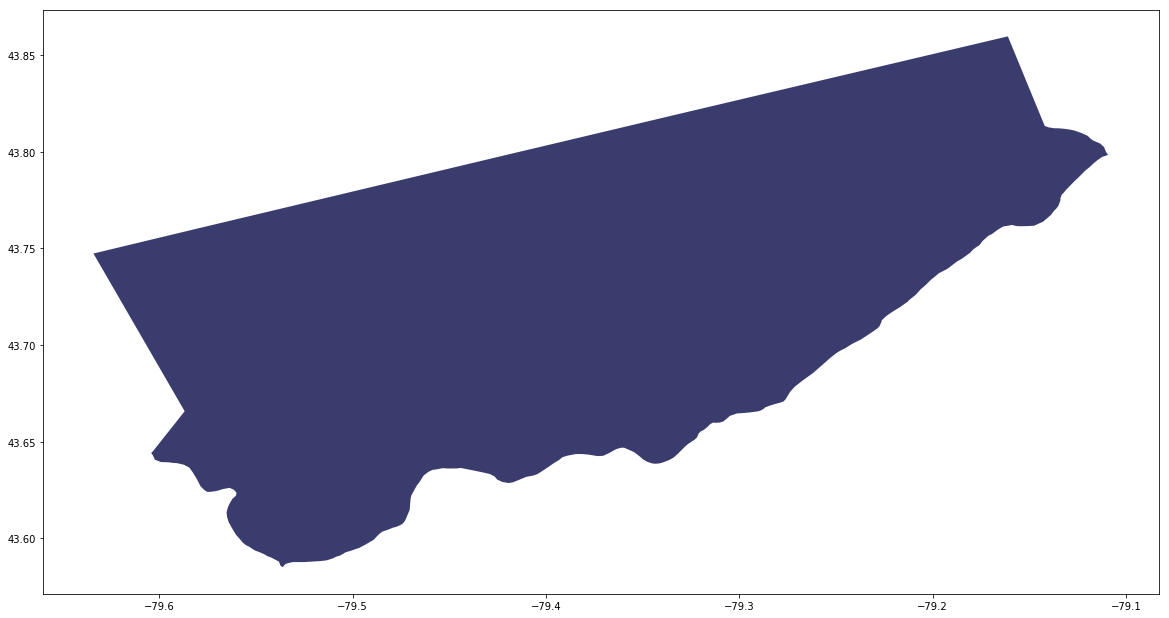

In [28]:
data1[data1['LOC_NAME'].isin(['METROPOLITAN TORONTO']) == True].plot(figsize = (20,13), color =  '#3B3C6E');

In [36]:
torontoData = data1[data1['LOC_NAME'].isin(['METROPOLITAN TORONTO']) == True]

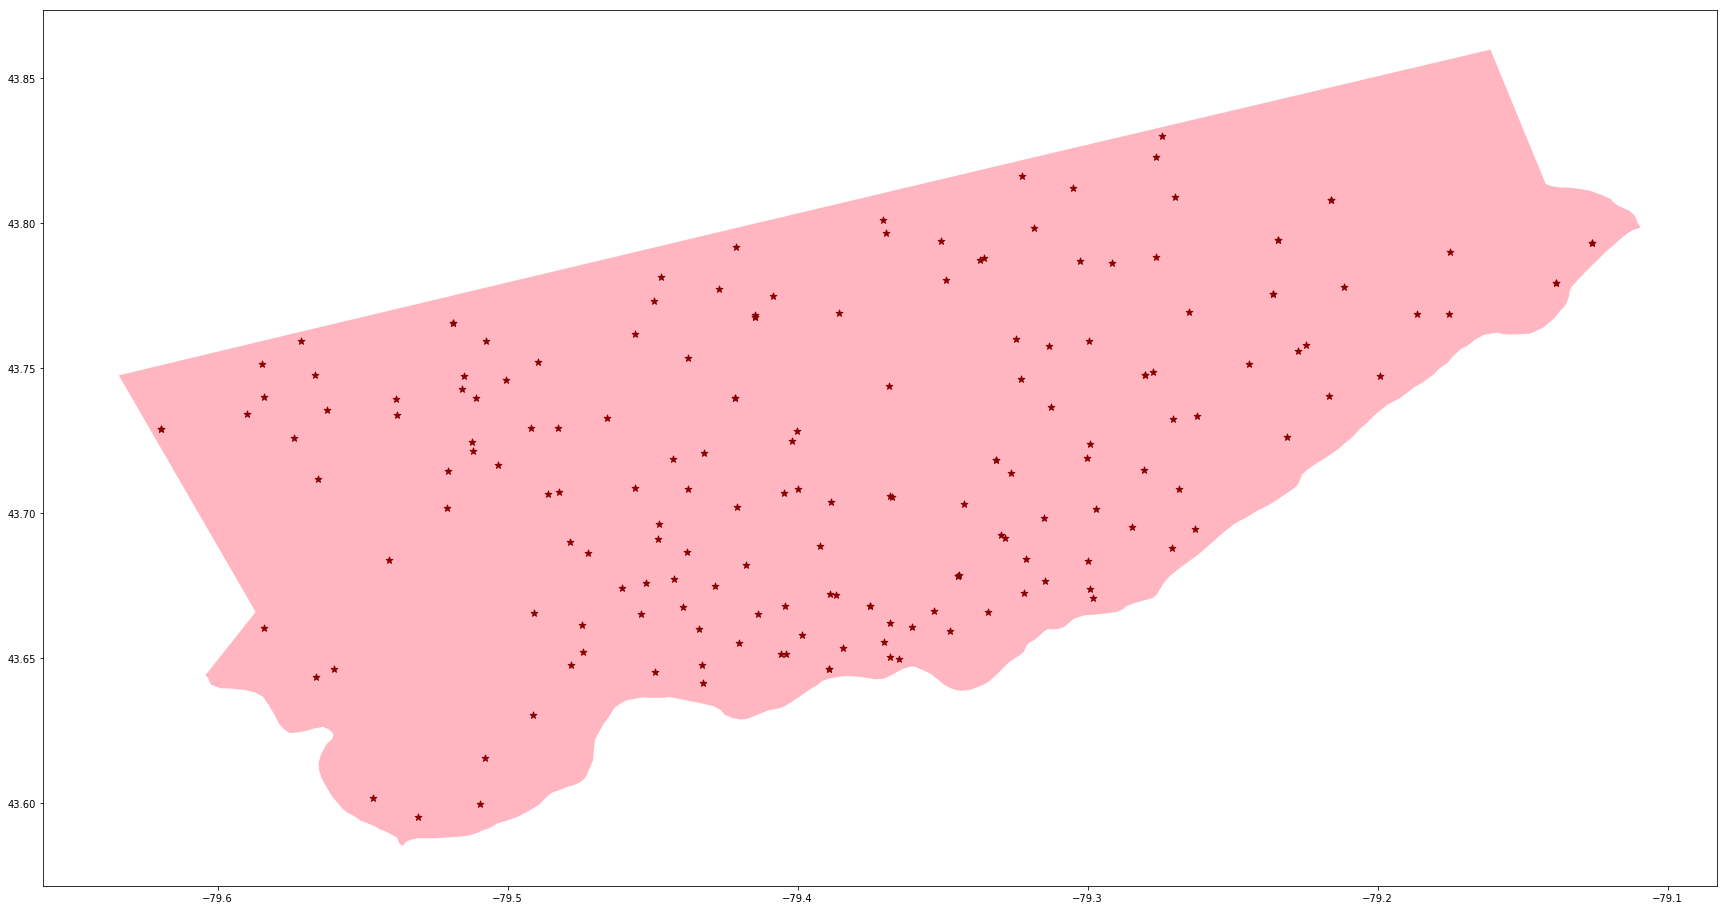

In [40]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = torontoData.plot(ax=ax, color='#FFB6C1')

#  on top with red color to stand out
file.plot(ax=base, color='darkred', marker="*", markersize=50);

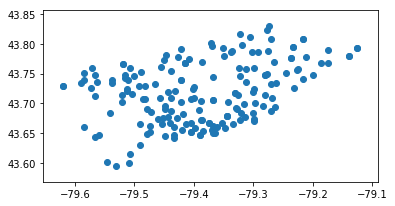

In [35]:
file.plot()